**fixing drive files issues**

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

**Import data to Google colab**

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'1Id1XeWx9UkqwMMc3kcanhLTpb8kCT5eb' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: CMPE 255 Group project.ipynb, id: 1UIBZMa3VLusVL-jylNPAX_OWhHtuakNW
title: CMPE 255_SignificantReport_Group3.docx, id: 1aqNthKHh5jhwO6xGutn1UcLVZDAj--tY
title: CMPE255_Group3_CreditCardFraudDetection.pptx, id: 1NOIB4zmKrngOsoItdtlI0siQQLDeE8V1
title: data, id: 1r59iFHOBBz0-snPQZAEwFUB5v6llLJfj
title: train_transaction.csv, id: 1-ozFH9YKaNQwMnUFN8cZ0F1W1zDych01
title: sample_submission.csv, id: 1Pdi-XbWTYCRugsfvD6DP6O-Qo6xwrOsb
title: test_identity.csv, id: 1NyZqEME34-SQqejDgK526djGxeSNlOwh
title: train_identity.csv, id: 1xTCIWmmFA8IThN9uyEo4NGs21yOTkxIT
title: test_transaction.csv, id: 1Ap7C4MeEHVDTp0xVmohF0v7NzovS-27K


In [0]:
train_downloaded = drive.CreateFile({'id': '1-ozFH9YKaNQwMnUFN8cZ0F1W1zDych01'})
train_downloaded.GetContentFile('train_transaction.csv')
test_downloaded = drive.CreateFile({'id': '1xTCIWmmFA8IThN9uyEo4NGs21yOTkxIT'})
test_downloaded.GetContentFile('train_identity.csv')
test_downloaded = drive.CreateFile({'id': '1Ap7C4MeEHVDTp0xVmohF0v7NzovS-27K'})
test_downloaded.GetContentFile('test_transaction.csv')
test_downloaded = drive.CreateFile({'id': '1NyZqEME34-SQqejDgK526djGxeSNlOwh'})
test_downloaded.GetContentFile('test_identity.csv')

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_colwidth',-1)

### Import Training set

In [2]:
identity_df = pd.read_csv('train_identity.csv')
identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
transaction_df = pd.read_csv('train_transaction.csv')
transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TransactionDT

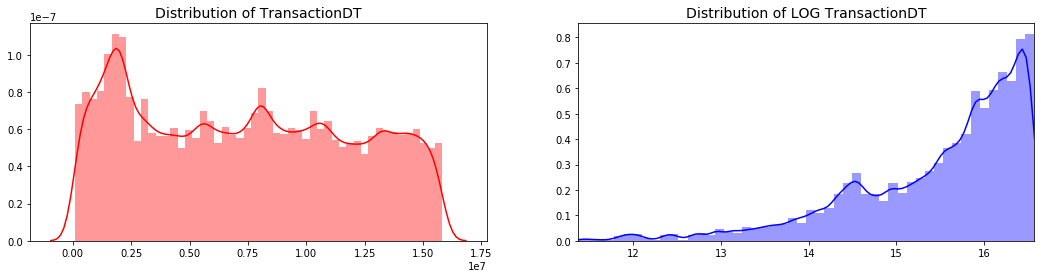

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = transaction_df['TransactionDT'].values

sns.distplot(time_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionDT', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionDT', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

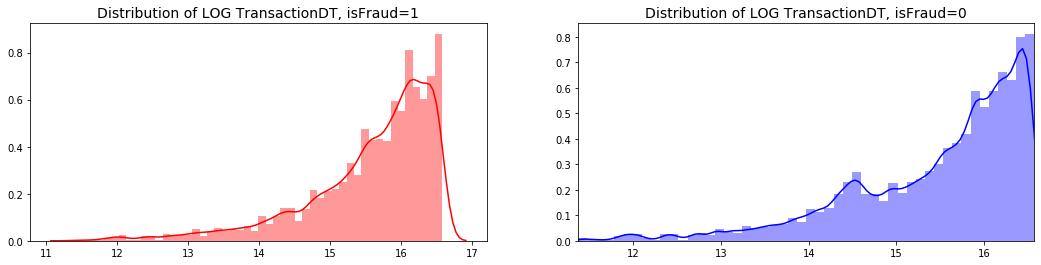

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = transaction_df.loc[transaction_df['isFraud'] == 1]['TransactionDT'].values

sns.distplot(np.log(time_val), ax=ax[0], color='r')
ax[0].set_title('Distribution of LOG TransactionDT, isFraud=1', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

time_val = transaction_df.loc[transaction_df['isFraud'] == 0]['TransactionDT'].values

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionDT, isFraud=0', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])


plt.show()

 ## Transaction Amt

### The ammount of transaction. I've taken a log transform in some of these plots to better show the distribution- otherwise the few, very large transactions skew the distribution. Because of the log transfrom, any values between 0 and 1 will appear to be negative.

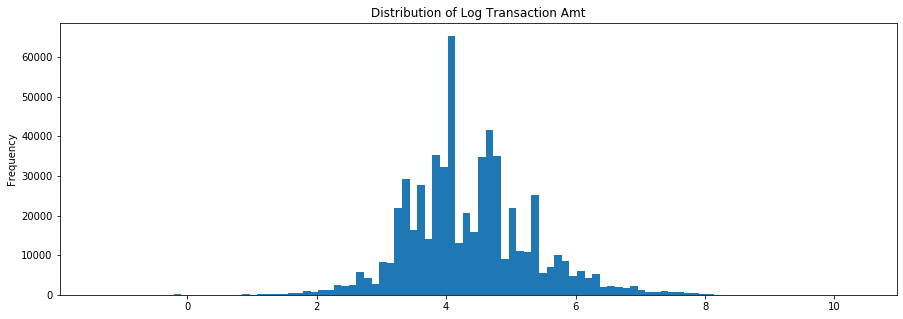

In [7]:
transaction_df['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribution of Log Transaction Amt')
plt.show()

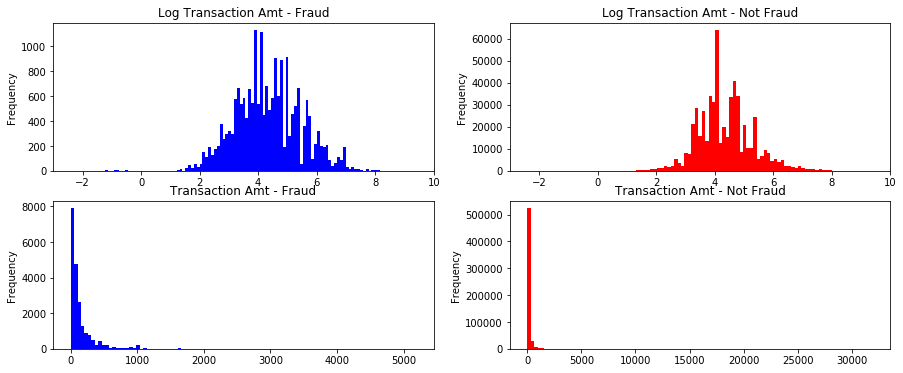

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
transaction_df.loc[transaction_df['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color='blue',
          xlim=(-3, 10),
         ax= ax1)
transaction_df.loc[transaction_df['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color='red',
          xlim=(-3, 10),
         ax=ax2)
transaction_df.loc[transaction_df['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color='blue',
         ax= ax3)
transaction_df.loc[transaction_df['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color='red',
         ax=ax4)
plt.show()

### Fraudulent charges appear to have a higher average transaction ammount


### The features below are all categorical, even though some appear numeric.

## Card 1 - Card 6

In [10]:
card_cols = [c for c in transaction_df.columns if 'card' in c]
transaction_df[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


### Frequency of usage of different cards

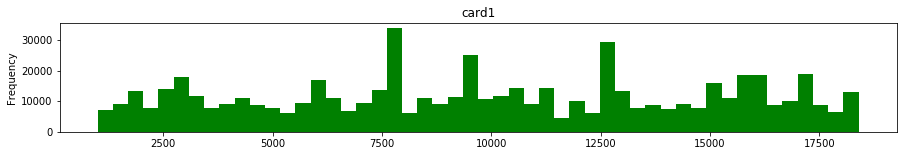

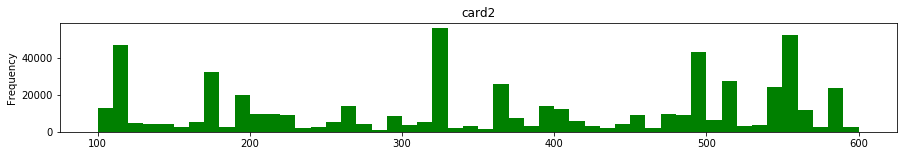

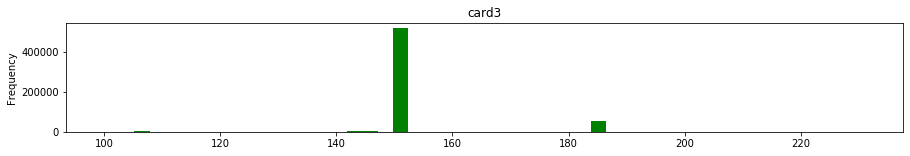

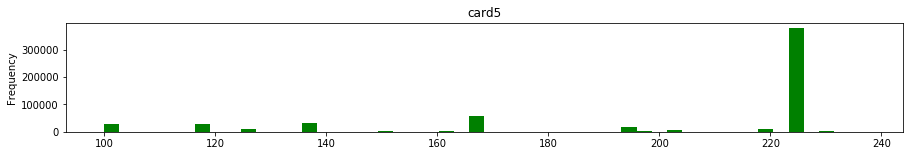

In [11]:
for c in card_cols:
    if transaction_df[c].dtype in ['float64','int64']:
        transaction_df[c].plot(kind='hist',
                                      title=c,
                                      bins=50,
                                      figsize=(15, 2),
                                      color='green')
    plt.show()

### Classification of Fraud/Not Fraud for Card type 4 and 6.

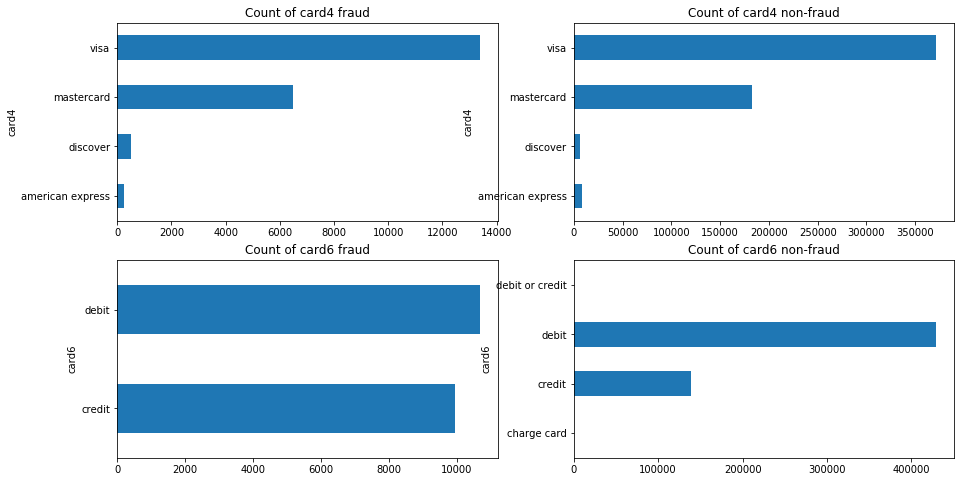

In [12]:
train_transaction_fr = transaction_df.loc[transaction_df['isFraud'] == 1]
train_transaction_nofr = transaction_df.loc[transaction_df['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_transaction_fr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud')
train_transaction_nofr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud')
train_transaction_fr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='Count of card6 fraud')
train_transaction_nofr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='Count of card6 non-fraud')
plt.show()

## Addr1 & Addr2

### Could they be the address value?


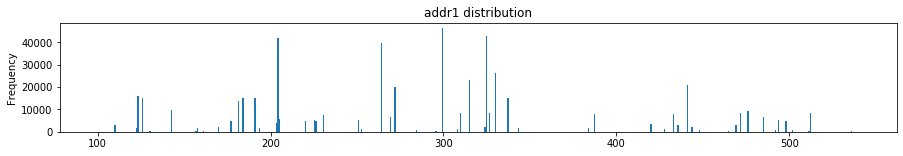

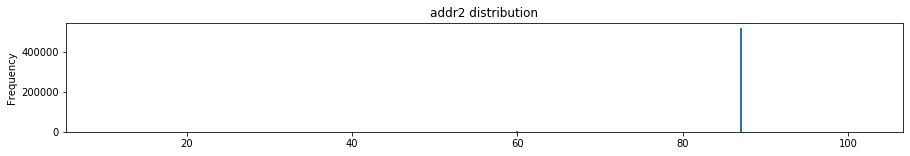

In [13]:
transaction_df['addr1'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr1 distribution')
plt.show()
transaction_df['addr2'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr2 distribution')
plt.show()

## Dist1 & Dist2


### Plotting with logx to better show the distribution. Possibly this could be the distance of the transaction vs. the card owner's home/work address. 

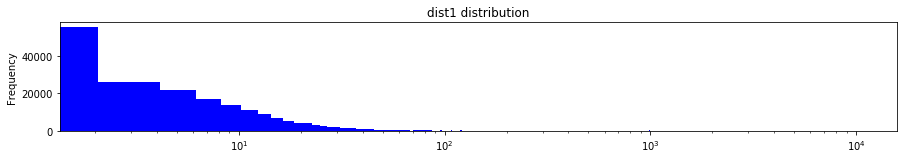

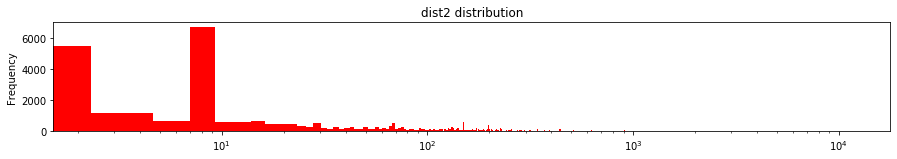

In [14]:
transaction_df['dist1'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist1 distribution',
                                color='blue',
                                logx=True)
plt.show()
transaction_df['dist2'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist2 distribution',
                                color='red',
                                logx=True)
plt.show()

## M1-M9

### Values are T F or NaN

In [15]:
m_cols = [c for c in transaction_df if c[0] == 'M']
transaction_df[m_cols].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


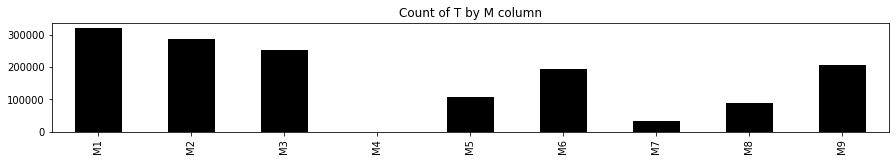

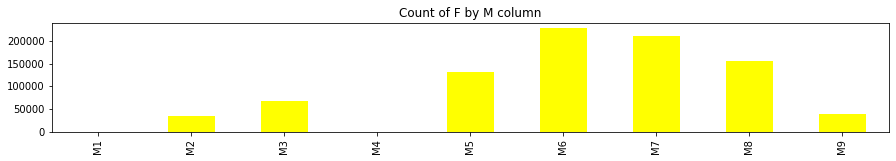

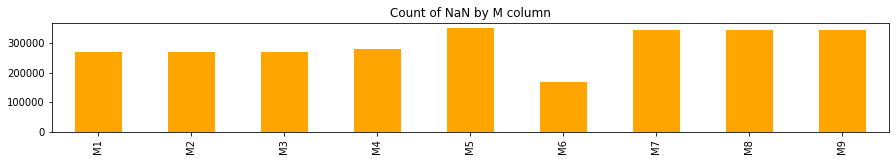

In [16]:
(transaction_df[m_cols] == 'T').sum().plot(kind='bar',
                                              title='Count of T by M column',
                                              figsize=(15, 2),
                                              color='black')
plt.show()
(transaction_df[m_cols] == 'F').sum().plot(kind='bar',
                                              title='Count of F by M column',
                                              figsize=(15, 2),
                                              color='yellow')
plt.show()
(transaction_df[m_cols].isna()).sum().plot(kind='bar',
                                              title='Count of NaN by M column',
                                              figsize=(15, 2),
                                              color='orange')
plt.show()


## V1 - V339

In [17]:
v_cols = [c for c in transaction_df if c[0] == 'V']
transaction_df[v_cols].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
transaction_df['v_mean'] = transaction_df[v_cols].mean(axis=1)

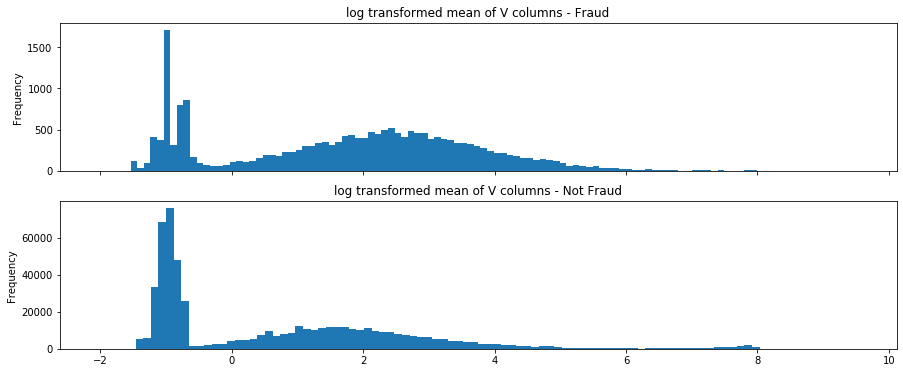

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 6))
transaction_df.loc[transaction_df['isFraud'] == 1]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Fraud',
          ax=ax1)
transaction_df.loc[transaction_df['isFraud'] == 0]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Not Fraud',
          ax=ax2)
plt.show()

In [20]:
# Add the `isFraud` column for analysis
train_identity_ = identity_df.merge(transaction_df[['TransactionID',
                                                         'TransactionDT',
                                                         'isFraud']],
                                      on=['TransactionID'])

### Next we will explore the identity data. These are provided for some, but not all TransactionIDs. It contains information about the identity of the customer.

## Device Type & Device Info

### Fraud depending on the type of device


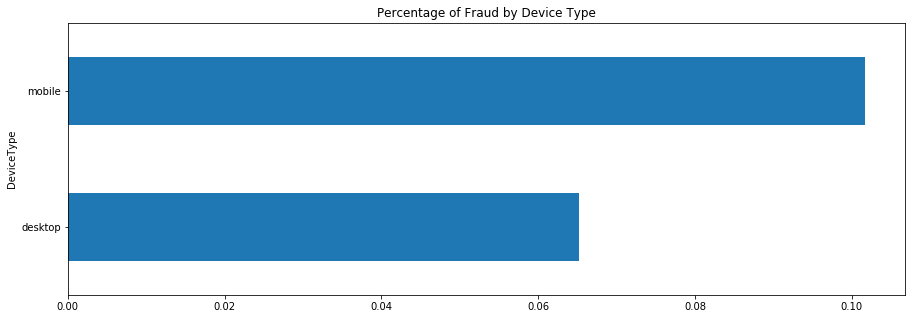

In [21]:
train_identity_.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Percentage of Fraud by Device Type')
plt.show()

### Top 20 devices in the dataset

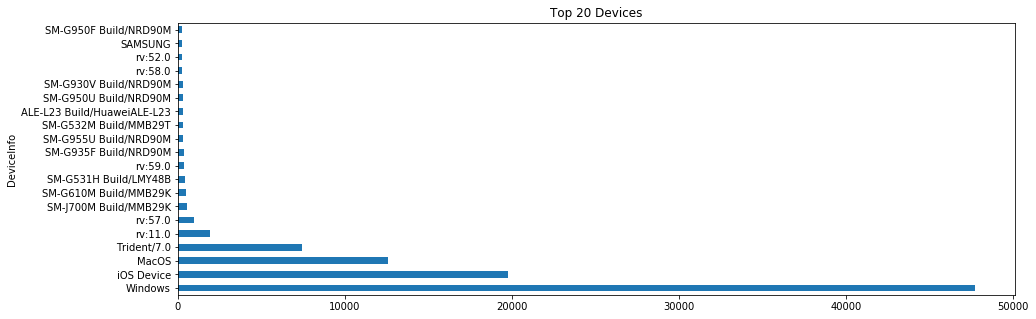

In [22]:
train_identity_.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices')
plt.show()

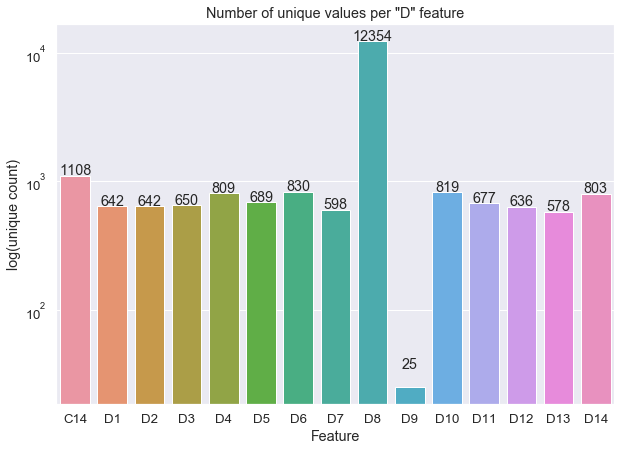

In [23]:
plt.figure(figsize=(10, 7))
d_features = list(transaction_df.columns[30:45])
uniques = [len(transaction_df[col].unique()) for col in d_features]
sns.set(font_scale=1.2)
ax = sns.barplot(d_features, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per "D" feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

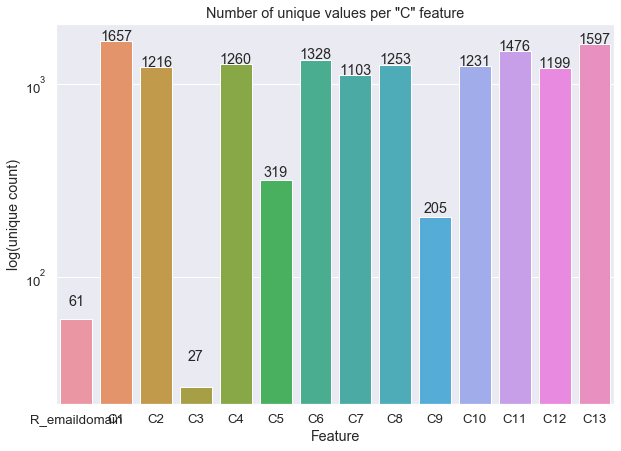

In [24]:
plt.figure(figsize=(10, 7))
c_features = list(transaction_df.columns[16:30])
uniques = [len(transaction_df[col].unique()) for col in c_features]
sns.set(font_scale=1.2)
ax = sns.barplot(c_features, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per "C" feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

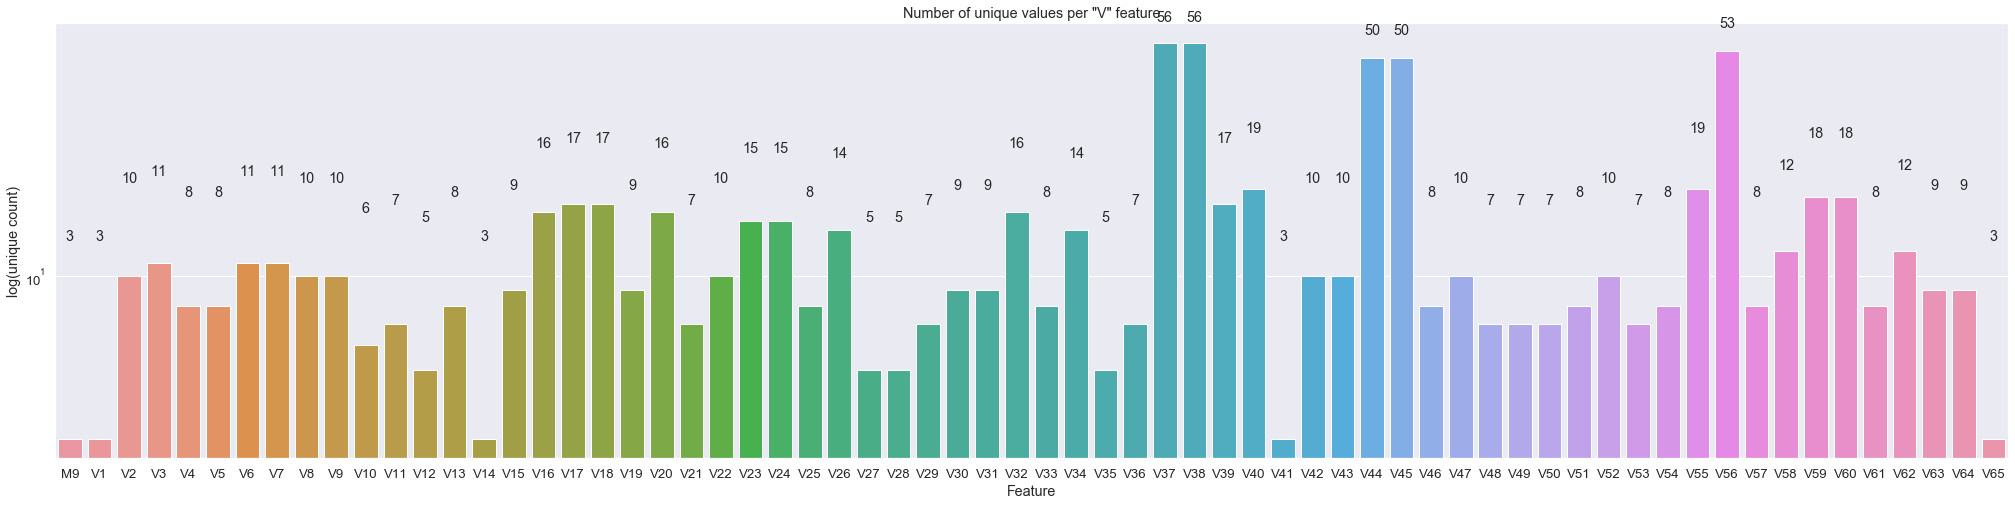

In [25]:
plt.figure(figsize=(35, 8))
v_features = list(transaction_df.columns[54:120])
uniques = [len(transaction_df[col].unique()) for col in v_features]
sns.set(font_scale=1.2)
ax = sns.barplot(v_features, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per "V" feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center")



```
# This is formatted as code
```

**Import training set and test set into dataframe**

In [1]:
import pandas
import numpy as np
train_transaction = pandas.read_csv('train_transaction.csv')
train_identity = pandas.read_csv('train_identity.csv')
test_transaction = pandas.read_csv('test_transaction.csv')
test_identity = pandas.read_csv('test_identity.csv')
train_set = train_transaction.merge(train_identity,on='TransactionID',how='left')
test_set = test_transaction.merge(test_identity,on='TransactionID',how='left')
train_set.append(test_set)
df = train_set
df.describe().transpose()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
card2,581607.0,3.625555e+02,1.577932e+02,100.000,214.000,361.000,512.00,6.000000e+02
card3,588975.0,1.531949e+02,1.133644e+01,100.000,150.000,150.000,150.00,2.310000e+02
card5,586281.0,1.992789e+02,4.124445e+01,100.000,166.000,226.000,226.00,2.370000e+02
addr1,524834.0,2.907338e+02,1.017411e+02,100.000,204.000,299.000,330.00,5.400000e+02
addr2,524834.0,8.680063e+01,2.690623e+00,10.000,87.000,87.000,87.00,1.020000e+02


**Function to reduce memoery**

In [0]:
def reduce_mem(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

**Applying memory reduction to our dataset**

In [0]:
reduce_mem(df)

In [2]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


**Replace all null values**

In [3]:
df.isnull().any().sum()

414

In [4]:
#df = df.fillna(df.me)
df = df.fillna(0)
df.isnull().any().sum()

0

**Transform categorical features to numerical**

In [5]:
categorical_data = df.select_dtypes(include=[object])

In [6]:
categorical_data.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,0,0,T,T,T,M2,F,...,0,0,0,0,0,0,0,0,0,0
1,W,mastercard,credit,gmail.com,0,0,0,0,M0,T,...,0,0,0,0,0,0,0,0,0,0
2,W,visa,debit,outlook.com,0,T,T,T,M0,F,...,0,0,0,0,0,0,0,0,0,0
3,W,mastercard,debit,yahoo.com,0,0,0,0,M0,T,...,0,0,0,0,0,0,0,0,0,0
4,H,mastercard,credit,gmail.com,0,0,0,0,0,0,...,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
df = df.drop(categorical_data.columns,axis = 1)

In [8]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987000,0,86400,68.5,13926,0.0,150.0,142.0,315.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,166.0,0.0,542.0,144.0,0.0,0.0,0.0,0.0,0.0,32.0


In [9]:
from sklearn import preprocessing
encoding = preprocessing.OneHotEncoder()
categorical_data.replace(0, "0", inplace=True)

le = preprocessing.LabelEncoder()
le_cat_data = categorical_data.apply(le.fit_transform)

le_cat_data.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,4,2,2,0,0,2,2,2,3,1,...,0,0,0,0,0,0,0,0,0,0
1,4,3,2,17,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,4,4,3,36,0,2,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,3,3,54,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
4,1,3,2,17,0,0,0,0,0,0,...,8,124,165,4,2,1,2,2,2,955


In [10]:
import pandas as pd
one_hot_encoded_df = pd.get_dummies(categorical_data)

In [11]:
df = pandas.concat([df, one_hot_encoded_df], axis=1)

**Standardize some of our features**

In [12]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df['amount'] = StandardScaler().fit_transform(df['TransactionAmt'].values.reshape(-1,1))
df['time'] = StandardScaler().fit_transform(df['TransactionDT'].values.reshape(-1,1))

df = df.drop(['TransactionDT','TransactionAmt'], axis = 1)
df.head()

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,TransactionID,isFraud,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,DeviceInfo_verykoolS5525,DeviceInfo_verykoolS5530 Build/LMY47I,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_vivo,DeviceInfo_xs-Z47b7VqTMxs,amount,time
0,2987000,0,13926,0.0,150.0,142.0,315.0,87.0,19.0,0.0,...,0,0,0,0,0,0,0,0,-0.278167,-1.577987
1,2987001,0,2755,404.0,150.0,102.0,325.0,87.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-0.443327,-1.577986
2,2987002,0,4663,490.0,150.0,166.0,330.0,87.0,287.0,0.0,...,0,0,0,0,0,0,0,0,-0.317889,-1.577972
3,2987003,0,18132,567.0,150.0,117.0,476.0,87.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-0.355521,-1.577965
4,2987004,0,4497,514.0,150.0,102.0,420.0,87.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-0.355521,-1.577964


In [13]:
X = df.drop(['isFraud'], axis = 1)
Y = df['isFraud']

**Applying PCA to get all features**

In [ ]:
pca = PCA(n_components=432)
pComponents = pca.fit_transform(X.values)

In [16]:
eigenvalues = pca.explained_variance_
total_sum = eigenvalues.sum()

Calculating the top 50 PCA to understand the transformed features

In [17]:
for i in range(1, 50):
  total = eigenvalues[:i].sum()
  variance = total/total_sum
  print('total variance for {} PCA is : {}'.format(i, variance))

total variance for 1 PCA is : 0.6629360681018661
total variance for 2 PCA is : 0.9264209197801964
total variance for 3 PCA is : 0.9941266714725079
total variance for 4 PCA is : 0.9989472831928682
total variance for 5 PCA is : 0.9994913384255368
total variance for 6 PCA is : 0.9996313545799902
total variance for 7 PCA is : 0.9997203891765344
total variance for 8 PCA is : 0.9997873774496456
total variance for 9 PCA is : 0.9998431488377786
total variance for 10 PCA is : 0.9998898773696442
total variance for 11 PCA is : 0.9999155483127679
total variance for 12 PCA is : 0.9999290064529144
total variance for 13 PCA is : 0.9999395997626466
total variance for 14 PCA is : 0.9999474505328575
total variance for 15 PCA is : 0.999954035666915
total variance for 16 PCA is : 0.9999599562237403
total variance for 17 PCA is : 0.9999655279866175
total variance for 18 PCA is : 0.9999698341297838
total variance for 19 PCA is : 0.9999733694851032
total variance for 20 PCA is : 0.9999759972914297
total vari

The top 2 elements represent for 99% of data. 

In order to test our hypothesis, applied 30 pca to our dataset.

In [ ]:
pca = PCA(n_components=30)
pComponents = pca.fit_transform(X.values)
pDf = pandas.DataFrame(data = pComponents
             , columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5','pc_6', 'pc_7','pc_8', 'pc_9', 'pc_10', 'pc_11', 'pc_12', 'pc_13', 'pc_14', 'pc_15', 'pc_16', 'pc_17', 'pc_18', 'pc_19', 'pc_20', 'pc_21', 'pc_22', 'pc_23', 'pc_24', 'pc_25', 'pc_26', 'pc_27', 'pc_28', 'pc_29', 'pca_30'])


In [14]:
finalDf = pandas.concat([X, Y], axis = 1)
finalDf.head()

,TransactionID,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,DeviceInfo_verykoolS5530 Build/LMY47I,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_vivo,DeviceInfo_xs-Z47b7VqTMxs,amount,time,isFraud
0,2987000,13926,0.0,150.0,142.0,315.0,87.0,19.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.278167,-1.577987,0
1,2987001,2755,404.0,150.0,102.0,325.0,87.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.443327,-1.577986,0
2,2987002,4663,490.0,150.0,166.0,330.0,87.0,287.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.317889,-1.577972,0
3,2987003,18132,567.0,150.0,117.0,476.0,87.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,-0.355521,-1.577965,0
4,2987004,4497,514.0,150.0,102.0,420.0,87.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.355521,-1.577964,0


**Visualizing the distribution of top 10 pca**

In [19]:
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.figure(figsize=(12,28*4))
plt.style.use('ggplot')
final_features = finalDf.iloc[:,0:10].columns
grid = gridspec.GridSpec(10, 1)
for i, cn in enumerate(final_features):
    axis = plt.subplot(grid[i])
    sns.distplot(finalDf[cn][finalDf.isFraud == 1], bins=50)
    sns.distplot(finalDf[cn][finalDf.isFraud == 0], bins=50)
    axis.set_xlabel('histogram of feature: ' + str(cn))
plt.show()

<Figure size 1200x11200 with 10 Axes>

In [20]:
#Resampling
# finalDf.shape
# finalDf = pandas.concat([X, Y], axis = 1)
# finalDf.head()

,TransactionID,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,amount,time,isFraud
0,2987000,13926,0.0,150.0,142.0,315.0,87.0,19.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.278167,-1.577987,0
1,2987001,2755,404.0,150.0,102.0,325.0,87.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.443327,-1.577986,0
2,2987002,4663,490.0,150.0,166.0,330.0,87.0,287.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.317889,-1.577972,0
3,2987003,18132,567.0,150.0,117.0,476.0,87.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,-0.355521,-1.577965,0
4,2987004,4497,514.0,150.0,102.0,420.0,87.0,0.0,0.0,1.0,...,4,2,1,2,2,2,955,-0.355521,-1.577964,0


**Splitting the data into test set and train set**

In [15]:
finalDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,170474.358321,2.987000e+06,3.134635e+06,3.282270e+06,3.429904e+06,3.577539e+06
card1,590540.0,9.898735e+03,4901.170153,1.000000e+03,6.019000e+03,9.678000e+03,1.418400e+04,1.839600e+04
card2,590540.0,3.570712e+02,162.727883,0.000000e+00,2.040000e+02,3.600000e+02,5.120000e+02,6.000000e+02
card3,590540.0,1.527889e+02,13.791462,0.000000e+00,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02
card5,590540.0,1.978417e+02,44.420452,0.000000e+00,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02
addr1,590540.0,2.583855e+02,132.506081,0.000000e+00,1.840000e+02,2.720000e+02,3.270000e+02,5.400000e+02
addr2,590540.0,7.714282e+01,27.412877,0.000000e+00,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02
dist1,590540.0,4.781284e+01,243.261185,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.028600e+04
dist2,590540.0,1.477296e+01,145.053578,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.162300e+04
C1,590540.0,1.409246e+01,133.569018,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,4.685000e+03


In [16]:
finalDf_copy = finalDf.copy()
#Spliting the data set into train and test set.

train_set = finalDf_copy.sample(frac=0.80, random_state=0)
test_set = finalDf_copy.drop(train_set.index)
train_set.shape

(472432, 2865)

In [17]:
#Class Count after resampling
class_count_resample=train_set['isFraud'].value_counts().values
print(class_count_resample)
sns.barplot(['Genuine','Fraud'],class_count_resample)

[455904  16528]


NameError: name 'sns' is not defined

In [18]:
del finalDf_copy
del finalDf

In [19]:
#Now we have traing set lets count how many samples of each class do we have
df_isFraud = train_set[train_set.isFraud == 1]
df_notFraud = train_set[train_set.isFraud == 0]

In [20]:
df_isFraud.shape


(16528, 2865)

In [21]:
df_notFraud.shape

(455904, 2865)

**Down Sampling**

In [22]:
from sklearn.utils import resample
df_downsampled = resample(df_notFraud,
                                      replace=False,
                                      n_samples=df_isFraud.shape[0])    # to match minority class
print("After Down Sampling:\n",df_downsampled.shape,df_isFraud.shape)

After Down Sampling:
 (16528, 2865) (16528, 2865)


**Upsampling**

In [23]:
from sklearn.utils import resample
df_upsampled = resample(df_isFraud, replace=True, n_samples=df_notFraud.shape[0], random_state=12 )    # to match majority class
print("After Up Sampling:\n",df_upsampled.shape,df_isFraud.shape)

After Up Sampling:
 (455904, 2865) (16528, 2865)


In [24]:
from sklearn.utils import shuffle
df_train = shuffle(pandas.concat([df_downsampled,df_isFraud]))

In [25]:
df_train_up = shuffle(pandas.concat([df_upsampled,df_notFraud]))

In [26]:
#Class Count after resampling
class_count_resample=df_train['isFraud'].value_counts().values
print(class_count_resample)
sns.barplot(['Genuine','Fraud'],class_count_resample)

[16528 16528]


NameError: name 'sns' is not defined

In [27]:
#Class Count after resampling
class_count_resample=df_train_up['isFraud'].value_counts().values
print(class_count_resample)
sns.barplot(['Genuine','Fraud'],class_count_resample)

[455904 455904]


NameError: name 'sns' is not defined

In [28]:
df_train

,TransactionID,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,DeviceInfo_verykoolS5530 Build/LMY47I,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_vivo,DeviceInfo_xs-Z47b7VqTMxs,amount,time,isFraud
154542,3141542,13526,529.0,150.0,162.0,485.0,87.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,0.480731,-0.905074,1
197625,3184625,5950,404.0,150.0,195.0,299.0,87.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,-0.460052,-0.628250,1
408109,3395109,17266,273.0,185.0,224.0,0.0,0.0,0.0,0.0,4.0,...,0,0,0,0,0,0,0,-0.274057,0.634748,0
108515,3095515,5751,556.0,150.0,224.0,264.0,87.0,0.0,4.0,1.0,...,0,0,0,0,0,0,0,-0.397333,-1.132341,0
464214,3451214,7622,555.0,150.0,226.0,315.0,87.0,13.0,0.0,4.0,...,0,0,0,0,0,0,0,-0.355521,0.987450,0
163995,3150995,2616,0.0,150.0,102.0,469.0,87.0,17.0,0.0,3.0,...,0,0,0,0,0,0,0,1.994139,-0.845476,0
119308,3106308,1976,545.0,185.0,102.0,0.0,0.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,-0.294023,-1.092840,0
526062,3513062,10989,0.0,0.0,0.0,441.0,87.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,-0.501865,1.397244,0
334169,3321169,17607,182.0,150.0,226.0,330.0,87.0,7.0,0.0,3.0,...,0,0,0,0,0,0,0,-0.113217,0.182916,0
585269,3572269,7664,490.0,150.0,226.0,264.0,87.0,0.0,0.0,5.0,...,0,0,0,0,0,0,0,0.167137,1.791206,1


In [29]:
#Now we have the balanced traing data set we can 
#Divide the data set into X and y
y_train = df_train.isFraud
X_train = df_train.drop('isFraud',axis=1)

y_test = test_set.isFraud
X_test = test_set.drop('isFraud',axis=1)


**Using Logistic Regression**
traning our Model

In [30]:

from sklearn.linear_model import LogisticRegression as logReg
model_LR = logReg().fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
prediction_LR = model_LR.predict(X_test)

from sklearn.metrics import accuracy_score

#Testing the model for accuracy on test data set
print(accuracy_score(y_test,prediction_LR))

0.7931808175568124


In [32]:
from sklearn import metrics
confusion_matrix_LR = metrics.confusion_matrix(y_test, prediction_LR)
confusion_matrix_LR

array([[91017, 22956],
       [ 1471,  2664]])

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_LR))
print("Precision:",metrics.precision_score(y_test, prediction_LR))
print("Recall:",metrics.recall_score(y_test, prediction_LR))
print("matthews_corrcoef:", metrics.matthews_corrcoef(y_test, prediction_LR))

Accuracy: 0.7931808175568124
Precision: 0.10398126463700234
Recall: 0.6442563482466748
matthews_corrcoef: 0.1974938386887096


**Using Naive Bayes**
traning our Model

In [36]:
n_X_train = X_train + 1
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB().fit(n_X_train,y_train)
prediction_NB = model_NB.predict(X_test)
print(accuracy_score(y_test,prediction_NB))

0.09537880583872388


In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_NB))
print("Precision:",metrics.precision_score(y_test, prediction_NB))
print("Recall:",metrics.recall_score(y_test, prediction_NB))
print("matthews_corrcoef:", metrics.matthews_corrcoef(y_test, prediction_NB))

Accuracy: 0.09537880583872388
Precision: 0.036064033534492106
Recall: 0.9654171704957678
matthews_corrcoef: 0.022147895009550955


**Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_RF = RandomForestClassifier(
    n_estimators=400, max_features=0.3,
    min_samples_leaf=20, n_jobs=-1, verbose=1)

In [40]:
model_RF.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [41]:
prediction_RF = model_RF.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    1.9s finished


In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_RF))
print("Precision:",metrics.precision_score(y_test, prediction_RF))
print("Recall:",metrics.recall_score(y_test, prediction_RF))
print("matthews_corrcoef:", metrics.matthews_corrcoef(y_test, prediction_RF))

Accuracy: 0.8548531852203068
Precision: 0.17024944230379233
Recall: 0.8120918984280532
matthews_corrcoef: 0.3294413739309298


In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_RF)
# metrics.accuracy_score(y_test, prediction_RF)
# model_RF.score(y_test, prediction_RF)

0.8342482427396862

**SVM**

In [44]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
predict_SVM = model_svm.predict(X_test)

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict_SVM)


0.5101397166861186

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, predict_SVM))
print("Precision:",metrics.precision_score(y_test, predict_SVM))
print("Recall:",metrics.recall_score(y_test, predict_SVM))
print("matthews_corrcoef:", metrics.matthews_corrcoef(y_test, predict_SVM))

Accuracy: 0.9584702137027128
Precision: 0.1157684630738523
Recall: 0.028053204353083436
matthews_corrcoef: 0.04064163104143781


**KMeans**

In [48]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_train)
# Getting the cluster labels
predict_kmeans = kmeans.predict(X_test)
# Centroid values
centroids = kmeans.cluster_centers_

# print(centroids) # From sci-kit learn

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, predict_kmeans))
print("Precision:",metrics.precision_score(y_test, predict_kmeans))
print("Recall:",metrics.recall_score(y_test, predict_kmeans))
print("matthews_corrcoef:", metrics.matthews_corrcoef(y_test, predict_kmeans))

Accuracy: 0.5148254140278389
Precision: 0.03723496849214915
Recall: 0.517291414752116
matthews_corrcoef: 0.011778002506870106


In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict_kmeans)

0.516013680492498

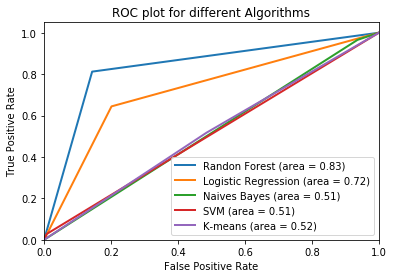

In [52]:
import numpy as np
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
lw = 2
# logistic regression
FPR_LR,TPR_LR,th_LR = metrics.roc_curve(y_test,prediction_LR)
area_LR = roc_auc_score(y_test,prediction_LR)
# Naives Byaes
FPR_NB,TPR_NB,th_NB = metrics.roc_curve(y_test,prediction_NB)
area_NB = roc_auc_score(y_test,prediction_NB)
# Randon Forest
FPR_RF,TPR_RF,th_RF = metrics.roc_curve(y_test,prediction_RF)
area_RF = roc_auc_score(y_test,prediction_RF)
# SVM
FPR_SVM,TPR_SVM,th_SVM = metrics.roc_curve(y_test,predict_SVM)
area_SVM = roc_auc_score(y_test,predict_SVM)
# Kmeans
FPR_kmeans,TPR_kmeans,th_kmeans = metrics.roc_curve(y_test,predict_kmeans)
area_kmeans = roc_auc_score(y_test,predict_kmeans)


plt.plot(FPR_RF,TPR_RF,lw=lw, label='Randon Forest (area = %0.2f)' % area_RF)
plt.plot(FPR_LR,TPR_LR,lw=lw, label='Logistic Regression (area = %0.2f)' % area_LR)
plt.plot(FPR_NB,TPR_NB,lw=lw, label='Naives Bayes (area = %0.2f)' % area_NB)
plt.plot(FPR_SVM,TPR_SVM,lw=lw, label='SVM (area = %0.2f)' % area_SVM)
plt.plot(FPR_kmeans,TPR_kmeans,lw=lw, label='K-means (area = %0.2f)' % area_kmeans)





# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for different Algorithms')
plt.legend(loc="lower right")
plt.show()

